## 1. PROJECT TITLE : NBA 2020 Player Performance Analysis

### Overview 

This project aims to analyze individual player performances from the 2019–2020 NBA season using per-game statistics. The dataset is sourced from Basketball Reference, a trusted source for historical and current basketball statistics. The ultimate goal of this analysis is to extract meaningful insights about player efficiency, compare performance metrics across positions and teams, and identify standout players using statistical techniques and visualizations.

### Data Used 

The dataset used in this project is scraped from the following web page:
URL: https://www.basketball-reference.com/leagues/NBA_2020_per_game.html

The key features (columns) collected include:

Player Name
Position (Pos)
Team (Tm)
Games Played (G)
Games Started (GS)
Minutes per Game (MPG)
Points per Game (PPG)
Rebounds per Game (RPG)
Assists per Game (APG)
Field Goal %, 3P %, FT %
Steals, Blocks, Turnovers, and more

### Methodology 

### Objectives of the Analysis :

## 2. DATA PREPROCESSING :

### Step 1: Install & Import Required Libraries

In [3]:
# Standard imports
import pandas as pd
import numpy as np

# For web scraping
import requests
import urllib.request
from bs4 import BeautifulSoup

# For performing regex operations
import re

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt


### Step 2: Scrape Data from Basketball Reference

In [6]:
# URL for NBA 2020 per game stats
url = 'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'
url

'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'

In [8]:
page=requests.get(url)
page


<Response [200]>

In [9]:
# Send request and parse content
response = requests.get(url)
response
soup = BeautifulSoup(response.content, "html.parser")
soup


<!DOCTYPE html>

<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://cdn.ssref.net/req/202504231" rel="dns-prefetch"/>
<script>
/* https://docs.osano.com/hc/en-us/articles/22469433444372-Google-Consent-Mode-v2  */
  window.dataLayer = window.dataLayer ||[];
      function gtag(){dataLayer.push(arguments);}
      gtag('consent','default',{
        'ad_storage':'denied',
        'analytics_storage':'denied',
        'ad_user_data':'denied',
        'ad_personalization':'denied',
        'personalization_storage':'denied',
        'functionality_storage':'granted',
        'security_storage':'granted',
        'wait_for_update': 500
      });
      gtag("set", "ads_data_redaction", true);
</script>
<script src="https://cmp.osano.com/16CGnCU8UtNhM14sg/12669873-8cf8-4

In [65]:
# Display top 5 scorers, rebounders, and assisters
top_scorers = df[['Player', 'Team', 'PTS']].sort_values(by='PTS', ascending=False).head(5)
top_rebounders = df[['Player', 'Team', 'TRB']].sort_values(by='TRB', ascending=False).head(5)
top_assisters = df[['Player', 'Team', 'AST']].sort_values(by='AST', ascending=False).head(5)

print("Top 5 Scorers:")
print(top_scorers)

print("\nTop 5 Rebounders:")
print(top_rebounders)

print("\nTop 5 Assisters:")
print(top_assisters)

Top 5 Scorers:
                  Player Team   PTS
0           James Harden  HOU  34.3
1           Bradley Beal  WAS  30.5
2         Damian Lillard  POR  30.0
3             Trae Young  ATL  29.6
4  Giannis Antetokounmpo  MIL  29.5

Top 5 Rebounders:
                    Player Team   TRB
116           Clint Capela  HOU  13.8
4    Giannis Antetokounmpo  MIL  13.6
85        Hassan Whiteside  POR  13.5
96             Rudy Gobert  UTA  13.5
57        Domantas Sabonis  IND  12.4

Top 5 Assisters:
             Player Team   AST
13     LeBron James  LAL  10.2
3        Trae Young  ATL   9.3
5       Luka Dončić  DAL   8.8
125     Ricky Rubio  PHO   8.8
2    Damian Lillard  POR   8.0


In [8]:
# Multiple years

years = ['2016', '2017', '2018', '2019', '2020']
link = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

for year in years:
    url = link.format(year)
    print(url)

https://www.basketball-reference.com/leagues/NBA_2016_per_game.html
https://www.basketball-reference.com/leagues/NBA_2017_per_game.html
https://www.basketball-reference.com/leagues/NBA_2018_per_game.html
https://www.basketball-reference.com/leagues/NBA_2019_per_game.html
https://www.basketball-reference.com/leagues/NBA_2020_per_game.html


### Step 3: Export into .CSV

In [11]:

# Read all tables on the page
tables = pd.read_html(url)

# The first table is the one we need
df = tables[0]

# Remove repeated header rows inside the table
df = df[df['Player'] != 'Player']

# Optional: Reset index
df.reset_index(drop=True, inplace=True)

# Save to CSV
df.to_csv("NBA_2020_Per_Game_Stats.csv", index=False)

# Preview
print(df.head())


    Rk                 Player   Age Team Pos     G    GS    MP    FG   FGA  \
0  1.0           James Harden  30.0  HOU  SG  68.0  68.0  36.5   9.9  22.3   
1  2.0           Bradley Beal  26.0  WAS  SG  57.0  57.0  36.0  10.4  22.9   
2  3.0         Damian Lillard  29.0  POR  PG  66.0  66.0  37.5   9.5  20.4   
3  4.0             Trae Young  21.0  ATL  PG  60.0  60.0  35.3   9.1  20.8   
4  5.0  Giannis Antetokounmpo  25.0  MIL  PF  63.0  63.0  30.4  10.9  19.7   

   ...  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  \
0  ...  1.0   5.5   6.6  7.5  1.8  0.9  4.5  3.3  34.3   
1  ...  0.9   3.3   4.2  6.1  1.2  0.4  3.4  2.2  30.5   
2  ...  0.5   3.8   4.3  8.0  1.1  0.3  2.9  1.7  30.0   
3  ...  0.5   3.7   4.3  9.3  1.1  0.1  4.8  1.7  29.6   
4  ...  2.2  11.4  13.6  5.6  1.0  1.0  3.7  3.1  29.5   

                      Awards  
0              MVP-3,AS,NBA1  
1                        NaN  
2              MVP-8,AS,NBA2  
3                         AS  
4  MVP-1,DPOY-1,AS,NBA1,DEF

### Step 4: Feature Scaling

In [13]:
print("Total Features (Columns):", df.shape[1])
print("Total Observations (Rows):", df.shape[0])
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Total Features (Columns): 31
Total Observations (Rows): 652

Data Types:
 Rk        float64
Player     object
Age       float64
Team       object
Pos        object
G         float64
GS        float64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Awards     object
dtype: object

Missing Values:
 Rk          1
Player      0
Age         1
Team        1
Pos         1
G           1
GS          1
MP          1
FG          1
FGA         1
FG%         2
3P          1
3PA         1
3P%        35
2P          1
2PA         1
2P%         6
eFG%        2
FT          1
FTA         1
FT%        33
ORB         1
DRB         1
TRB         1


### Step 5: Convert into DataFrame

In [17]:
#This code converts an HTML table (extracted using BeautifulSoup) into a Pandas DataFrame. 

from io import StringIO
# If 'table' is a BeautifulSoup object
html_string = str(table)
html_string
df = pd.read_html(StringIO(html_string))[0]
df

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,James Harden,30.0,HOU,SG,68.0,68.0,36.5,9.9,22.3,...,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,"MVP-3,AS,NBA1"
1,2.0,Bradley Beal,26.0,WAS,SG,57.0,57.0,36.0,10.4,22.9,...,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5,NaN
2,3.0,Damian Lillard,29.0,POR,PG,66.0,66.0,37.5,9.5,20.4,...,0.5,3.8,4.3,8.0,1.1,0.3,2.9,1.7,30.0,"MVP-8,AS,NBA2"
3,4.0,Trae Young,21.0,ATL,PG,60.0,60.0,35.3,9.1,20.8,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,AS
4,5.0,Giannis Antetokounmpo,25.0,MIL,PF,63.0,63.0,30.4,10.9,19.7,...,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,"MVP-1,DPOY-1,AS,NBA1,DEF1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,526.0,William Howard,26.0,HOU,PF,2.0,0.0,6.5,0.0,2.0,...,0.0,1.0,1.0,0.5,0.0,0.0,0.5,0.5,0.0,NaN
648,527.0,Stanton Kidd,27.0,UTA,SG,4.0,0.0,3.8,0.0,0.8,...,0.0,0.8,0.8,0.3,0.0,0.0,0.5,0.8,0.0,NaN
649,528.0,J.P. Macura,24.0,CLE,SG,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
650,529.0,Isaiah Roby,21.0,OKC,PF,3.0,0.0,3.7,0.0,0.3,...,0.0,0.7,0.7,0.0,0.0,0.0,0.3,0.3,0.0,NaN


### Step 6: Data Cleaning

In [19]:
# Remove repeated header rows that appear in the table
df = df[df['Player'] != 'Player']
df

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,James Harden,30.0,HOU,SG,68.0,68.0,36.5,9.9,22.3,...,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,"MVP-3,AS,NBA1"
1,2.0,Bradley Beal,26.0,WAS,SG,57.0,57.0,36.0,10.4,22.9,...,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5,NaN
2,3.0,Damian Lillard,29.0,POR,PG,66.0,66.0,37.5,9.5,20.4,...,0.5,3.8,4.3,8.0,1.1,0.3,2.9,1.7,30.0,"MVP-8,AS,NBA2"
3,4.0,Trae Young,21.0,ATL,PG,60.0,60.0,35.3,9.1,20.8,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,AS
4,5.0,Giannis Antetokounmpo,25.0,MIL,PF,63.0,63.0,30.4,10.9,19.7,...,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,"MVP-1,DPOY-1,AS,NBA1,DEF1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,526.0,William Howard,26.0,HOU,PF,2.0,0.0,6.5,0.0,2.0,...,0.0,1.0,1.0,0.5,0.0,0.0,0.5,0.5,0.0,NaN
648,527.0,Stanton Kidd,27.0,UTA,SG,4.0,0.0,3.8,0.0,0.8,...,0.0,0.8,0.8,0.3,0.0,0.0,0.5,0.8,0.0,NaN
649,528.0,J.P. Macura,24.0,CLE,SG,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
650,529.0,Isaiah Roby,21.0,OKC,PF,3.0,0.0,3.7,0.0,0.3,...,0.0,0.7,0.7,0.0,0.0,0.0,0.3,0.3,0.0,NaN


In [21]:
# Reset index
df.reset_index(drop=True, inplace=True)
df

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,James Harden,30.0,HOU,SG,68.0,68.0,36.5,9.9,22.3,...,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,"MVP-3,AS,NBA1"
1,2.0,Bradley Beal,26.0,WAS,SG,57.0,57.0,36.0,10.4,22.9,...,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5,NaN
2,3.0,Damian Lillard,29.0,POR,PG,66.0,66.0,37.5,9.5,20.4,...,0.5,3.8,4.3,8.0,1.1,0.3,2.9,1.7,30.0,"MVP-8,AS,NBA2"
3,4.0,Trae Young,21.0,ATL,PG,60.0,60.0,35.3,9.1,20.8,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,AS
4,5.0,Giannis Antetokounmpo,25.0,MIL,PF,63.0,63.0,30.4,10.9,19.7,...,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,"MVP-1,DPOY-1,AS,NBA1,DEF1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,526.0,William Howard,26.0,HOU,PF,2.0,0.0,6.5,0.0,2.0,...,0.0,1.0,1.0,0.5,0.0,0.0,0.5,0.5,0.0,NaN
648,527.0,Stanton Kidd,27.0,UTA,SG,4.0,0.0,3.8,0.0,0.8,...,0.0,0.8,0.8,0.3,0.0,0.0,0.5,0.8,0.0,NaN
649,528.0,J.P. Macura,24.0,CLE,SG,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
650,529.0,Isaiah Roby,21.0,OKC,PF,3.0,0.0,3.7,0.0,0.3,...,0.0,0.7,0.7,0.0,0.0,0.0,0.3,0.3,0.0,NaN


In [69]:
# Drop rows with any null values
df_cleaned = df.dropna()
print("DataFrame after dropping rows with nulls:")
print(df_cleaned)

# Drop columns with any null values
df_cleaned_cols = df.dropna(axis=1)
print("\nDataFrame after dropping columns with nulls:")
print(df_cleaned_cols)


DataFrame after dropping rows with nulls:
Empty DataFrame
Columns: [Rk, Player, Age, Team, Pos, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, Awards]
Index: []

[0 rows x 31 columns]

DataFrame after dropping columns with nulls:
                    Player
0             James Harden
1             Bradley Beal
2           Damian Lillard
3               Trae Young
4    Giannis Antetokounmpo
..                     ...
647         William Howard
648           Stanton Kidd
649            J.P. Macura
650            Isaiah Roby
651         League Average

[470 rows x 1 columns]


In [23]:
# Convert relevant columns to numeric (ignore non-numeric with errors='coerce')
numeric_columns = df.columns.drop(['Player', 'Pos','Team'])
numeric_columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df[numeric_columns]


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,30.0,68.0,68.0,36.5,9.9,22.3,0.444,4.4,12.4,...,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,NaN
1,2.0,26.0,57.0,57.0,36.0,10.4,22.9,0.455,3.0,8.4,...,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5,NaN
2,3.0,29.0,66.0,66.0,37.5,9.5,20.4,0.463,4.1,10.2,...,0.5,3.8,4.3,8.0,1.1,0.3,2.9,1.7,30.0,NaN
3,4.0,21.0,60.0,60.0,35.3,9.1,20.8,0.437,3.4,9.5,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,NaN
4,5.0,25.0,63.0,63.0,30.4,10.9,19.7,0.553,1.4,4.7,...,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,526.0,26.0,2.0,0.0,6.5,0.0,2.0,0.000,0.0,2.0,...,0.0,1.0,1.0,0.5,0.0,0.0,0.5,0.5,0.0,NaN
648,527.0,27.0,4.0,0.0,3.8,0.0,0.8,0.000,0.0,0.3,...,0.0,0.8,0.8,0.3,0.0,0.0,0.5,0.8,0.0,NaN
649,528.0,24.0,1.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
650,529.0,21.0,3.0,0.0,3.7,0.0,0.3,0.000,0.0,0.0,...,0.0,0.7,0.7,0.0,0.0,0.0,0.3,0.3,0.0,NaN


In [61]:
# Removing duplicates
def remove_duplicates(df):
    filtered = df[~((df.duplicated(subset='Player', keep=False)) & (df['Team'] != 'TOT'))]
    return filtered

df = remove_duplicates(df)
df

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,James Harden,30.0,HOU,SG,68.0,68.0,36.5,9.9,22.3,...,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,NaN
1,2.0,Bradley Beal,26.0,WAS,SG,57.0,57.0,36.0,10.4,22.9,...,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5,NaN
2,3.0,Damian Lillard,29.0,POR,PG,66.0,66.0,37.5,9.5,20.4,...,0.5,3.8,4.3,8.0,1.1,0.3,2.9,1.7,30.0,NaN
3,4.0,Trae Young,21.0,ATL,PG,60.0,60.0,35.3,9.1,20.8,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,NaN
4,5.0,Giannis Antetokounmpo,25.0,MIL,PF,63.0,63.0,30.4,10.9,19.7,...,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,526.0,William Howard,26.0,HOU,PF,2.0,0.0,6.5,0.0,2.0,...,0.0,1.0,1.0,0.5,0.0,0.0,0.5,0.5,0.0,NaN
648,527.0,Stanton Kidd,27.0,UTA,SG,4.0,0.0,3.8,0.0,0.8,...,0.0,0.8,0.8,0.3,0.0,0.0,0.5,0.8,0.0,NaN
649,528.0,J.P. Macura,24.0,CLE,SG,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
650,529.0,Isaiah Roby,21.0,OKC,PF,3.0,0.0,3.7,0.0,0.3,...,0.0,0.7,0.7,0.0,0.0,0.0,0.3,0.3,0.0,NaN


In [75]:
# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 651
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      469 non-null    float64
 1   Player  470 non-null    object 
 2   Age     469 non-null    float64
 3   Team    0 non-null      float64
 4   Pos     469 non-null    object 
 5   G       469 non-null    float64
 6   GS      469 non-null    float64
 7   MP      469 non-null    float64
 8   FG      469 non-null    float64
 9   FGA     469 non-null    float64
 10  FG%     468 non-null    float64
 11  3P      469 non-null    float64
 12  3PA     469 non-null    float64
 13  3P%     445 non-null    float64
 14  2P      469 non-null    float64
 15  2PA     469 non-null    float64
 16  2P%     467 non-null    float64
 17  eFG%    468 non-null    float64
 18  FT      469 non-null    float64
 19  FTA     469 non-null    float64
 20  FT%     445 non-null    float64
 21  ORB     469 non-null    float64
 22  DRB    

### Step 7 : Data Manipulation 

In [78]:
# Make sure you're working with a fresh copy (optional but safe)
df = df.copy()

# Create a new column for player efficiency
df['Efficiency'] = (
    df['PTS'] + df['TRB'] + df['AST'] + df['STL'] + df['BLK']
    - (df['TOV'] + df['FGA'] - df['FG'] + df['FTA'] - df['FT'])
)

# Filter to focus only on players with meaningful regular season data
df = df[df['G'] > 10]  # Players who played more than 10 games

# Group by Player to calculate average stats (example)
player_avg_stats = df.groupby('Player')[['PTS', 'TRB', 'AST', 'Efficiency']].mean().reset_index()

# Sort to find top performers in terms of efficiency
top_efficiency = player_avg_stats.sort_values(by='Efficiency', ascending=False).head(5)

# Display the result
print(top_efficiency)


                    Player   PTS   TRB  AST  Efficiency
142  Giannis Antetokounmpo  29.5  13.6  5.6        34.5
171           James Harden  34.3   6.6  7.5        32.6
245            Luka Dončić  28.8   9.4  8.8        30.6
209     Karl-Anthony Towns  26.5  10.8  4.4        30.5
17           Anthony Davis  26.1   9.3  3.2        29.8


## 3. Data Analysis and Visualization (EDA) 

### Central Tendency

In [27]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['Rk', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Awards'],
      dtype='object')

In [29]:
central_tendency = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Median': df[numerical_cols].median(),
    'Mode': df[numerical_cols].mode().iloc[0]
})
print("Central Tendency:\n", central_tendency)


Central Tendency:
               Mean   Median   Mode
Rk      269.038402  271.000  140.0
Age      25.764977   25.000   24.0
G        38.216590   41.000   58.0
GS       17.537634    4.000    0.0
MP       19.179724   18.500   18.5
FG        3.097849    2.500    1.3
FGA       6.861444    5.600    3.0
FG%       0.442917    0.439    0.5
3P        0.938863    0.800    0.0
3PA       2.695392    2.300    0.0
3P%       0.313511    0.339    0.0
2P        2.160829    1.600    0.5
2PA       4.167435    3.100    1.0
2P%       0.507472    0.509    0.5
eFG%      0.506738    0.518    0.5
FT        1.337788    0.900    0.3
FTA       1.750538    1.300    0.5
FT%       0.743816    0.771    1.0
ORB       0.817051    0.600    0.3
DRB       2.748694    2.400    1.6
TRB       3.563287    3.100    2.3
AST       1.843932    1.300    0.8
STL       0.617665    0.600    0.4
BLK       0.398157    0.300    0.1
TOV       1.101075    0.900    0.8
PF        1.740092    1.700    1.9
PTS       8.461290    6.800    1.0
A

### Measures of Dispersion

In [31]:
dispersion = pd.DataFrame({
    'Std Dev': df[numerical_cols].std(),
    'Variance': df[numerical_cols].var(),
    'Range': df[numerical_cols].max() - df[numerical_cols].min(),
    'IQR': df[numerical_cols].quantile(0.75) - df[numerical_cols].quantile(0.25)
})
print("Measures of Dispersion:\n", dispersion)


Measures of Dispersion:
            Std Dev      Variance  Range        IQR
Rk      149.875508  22462.667754  528.0  259.00000
Age       4.023592     16.189295   24.0    5.00000
G        22.944430    526.446863   73.0   43.50000
GS       23.022124    530.018197   73.0   29.50000
MP        9.060972     82.101219   36.5   14.70000
FG        2.222285      4.938549   10.9    2.90000
FGA       4.667673     21.787173   22.9    6.00000
FG%       0.111442      0.012419    1.0    0.08675
3P        0.849802      0.722164    4.4    1.10000
3PA       2.191573      4.802994   12.4    2.80000
3P%       0.133425      0.017802    1.0    0.10700
2P        1.777765      3.160448    9.6    2.05000
2PA       3.284642     10.788876   18.7    3.70000
2P%       0.124775      0.015569    1.0    0.10950
eFG%      0.110100      0.012122    1.0    0.08200
FT        1.338949      1.792785   10.2    1.20000
FTA       1.658084      2.749242   11.8    1.60000
FT%       0.150524      0.022658    1.0    0.16900
ORB   

### Uni-variate Analysis (Numerical) 

#### Histogram / Distribution Plot

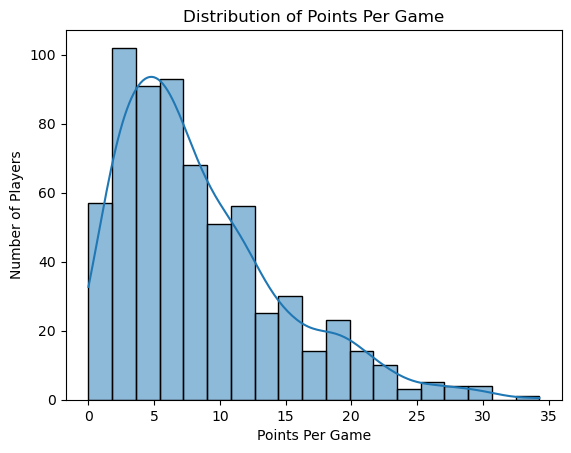

In [33]:
sns.histplot(df['PTS'], kde=True)
plt.title("Distribution of Points Per Game")
plt.xlabel("Points Per Game")
plt.ylabel("Number of Players")
plt.show()


#### Boxplot

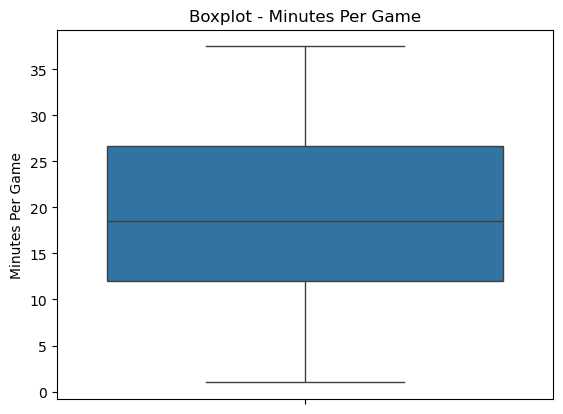

In [35]:
sns.boxplot(y=df['MP'])
plt.title("Boxplot - Minutes Per Game")
plt.ylabel("Minutes Per Game")
plt.show()


#### KDE Plot: Minutes Played (MP)

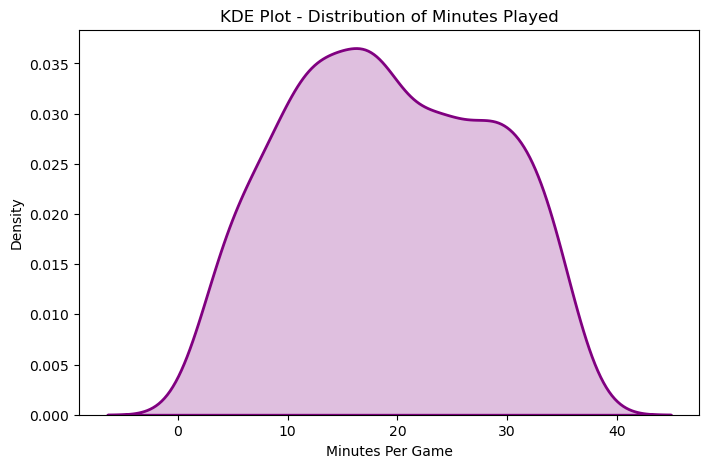

In [37]:
import seaborn as sns 
plt.figure(figsize=(8,5))
sns.kdeplot(df['MP'], fill=True, color='purple', linewidth=2)
plt.title("KDE Plot - Distribution of Minutes Played")
plt.xlabel("Minutes Per Game")
plt.ylabel("Density")
plt.show()


### Uni-variate (Categorical)

#### Countplot

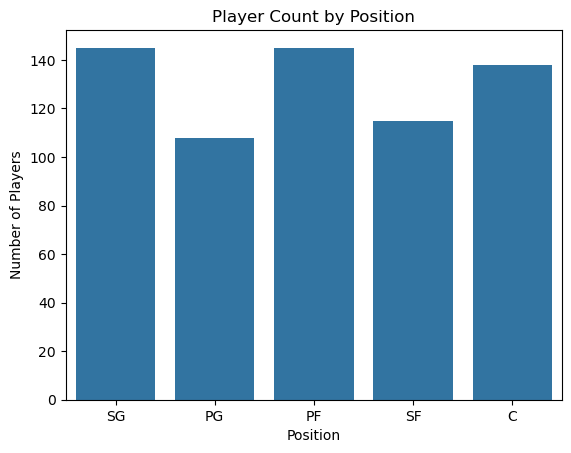

In [39]:
sns.countplot(x='Pos', data=df)
plt.title("Player Count by Position")
plt.xlabel("Position")
plt.ylabel("Number of Players")
plt.show()


#### Pie Chart

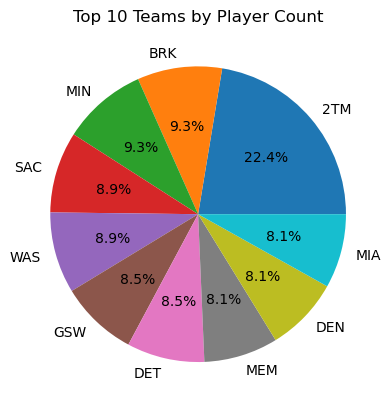

In [41]:
df['Team'].value_counts().head(10).plot.pie(autopct='%1.1f%%')
plt.title("Top 10 Teams by Player Count")
plt.ylabel('')
plt.show()


#### Bar Plot (Grouped by Categorical Variable Mean)

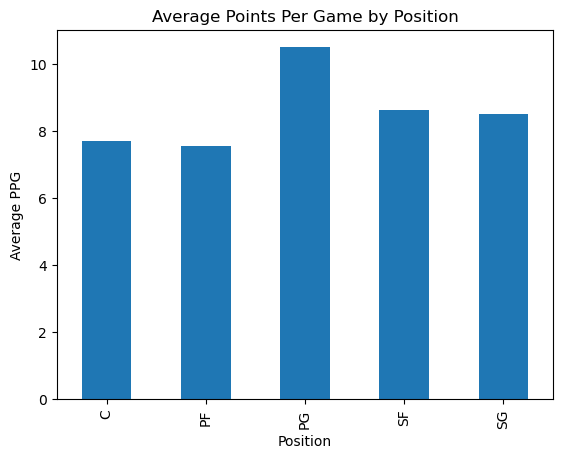

In [43]:
df.groupby('Pos')['PTS'].mean().plot(kind='bar')
plt.title("Average Points Per Game by Position")
plt.xlabel("Position")
plt.ylabel("Average PPG")
plt.show()


### Bi-variate / Multivariate Analysis

In [45]:
df.groupby('Pos')['PTS'].mean().sort_values(ascending=False)
#This shows which player positions score the most on average — e.g.,shooting guards (SG) and point guards (PG) typically lead.

Pos
PG    10.485185
SF     8.601739
SG     8.482759
C      7.696377
PF     7.548966
Name: PTS, dtype: float64

In [47]:
pivot = df.pivot_table(index='Pos', values=['PTS', 'AST', 'TRB'], aggfunc='mean')
print(pivot)
#Average Stats by Position

          AST        PTS       TRB
Pos                               
C    1.179710   7.696377  5.258696
PF   1.294483   7.548966  3.920690
PG   3.828704  10.485185  2.722222
SF   1.536522   8.601739  3.284348
SG   1.791034   8.482759  2.440000


#### Boxplot: Position vs Points

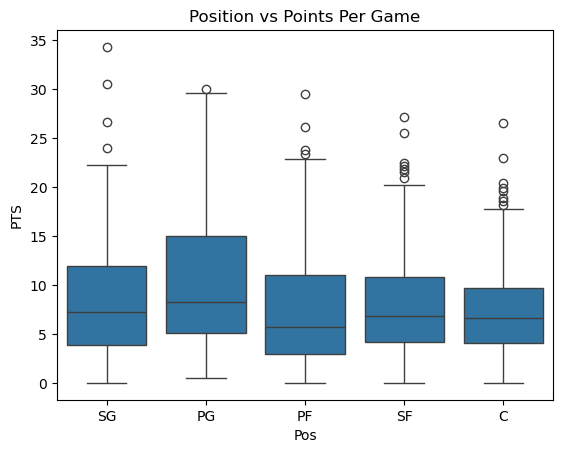

In [49]:
sns.boxplot(x='Pos', y='PTS', data=df)
plt.title("Position vs Points Per Game")
plt.show()


#### Correlation Matrix

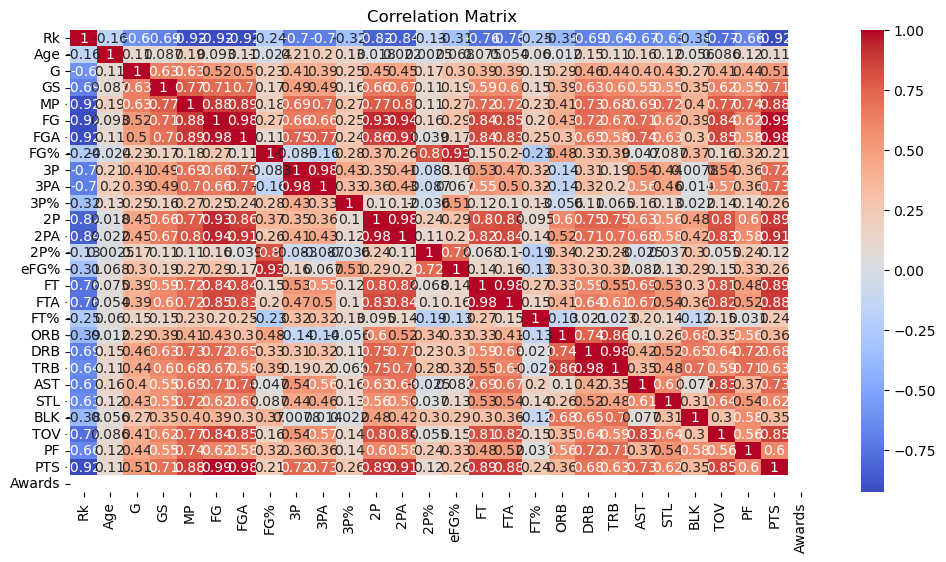

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


#### Scatter Plot: Minutes vs Points

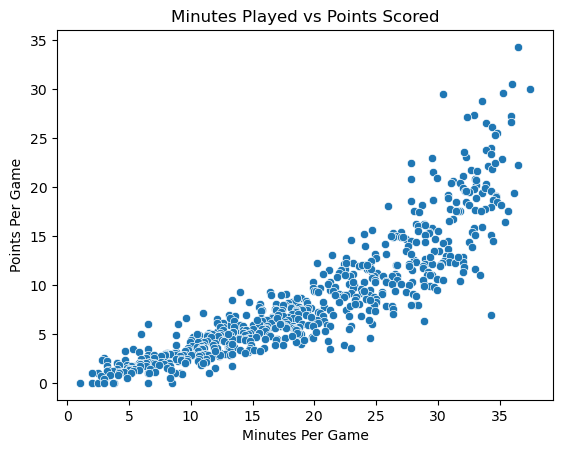

In [53]:
sns.scatterplot(x='MP', y='PTS', data=df)
plt.title("Minutes Played vs Points Scored")
plt.xlabel("Minutes Per Game")
plt.ylabel("Points Per Game")
plt.show()


#### Crosstab: Team vs Position

In [55]:
pd.crosstab(df['Team'], df['Pos']).head(10) #Shows how teams are structured — number of players by position on each team.


Pos,C,PF,PG,SF,SG
Team,,,,,
2TM,13,17,7,9,12
3TM,0,1,0,0,1
ATL,4,4,3,4,6
BOS,5,3,3,1,5
BRK,5,4,4,5,6
CHI,4,2,3,6,2
CHO,3,3,3,5,2
CLE,5,4,2,3,7
DAL,4,4,5,2,4


#### Countplot: Team Distribution (Top 10 Teams)

#### Violin Plot: Points Per Game (PTS) by Player Position (Pos)

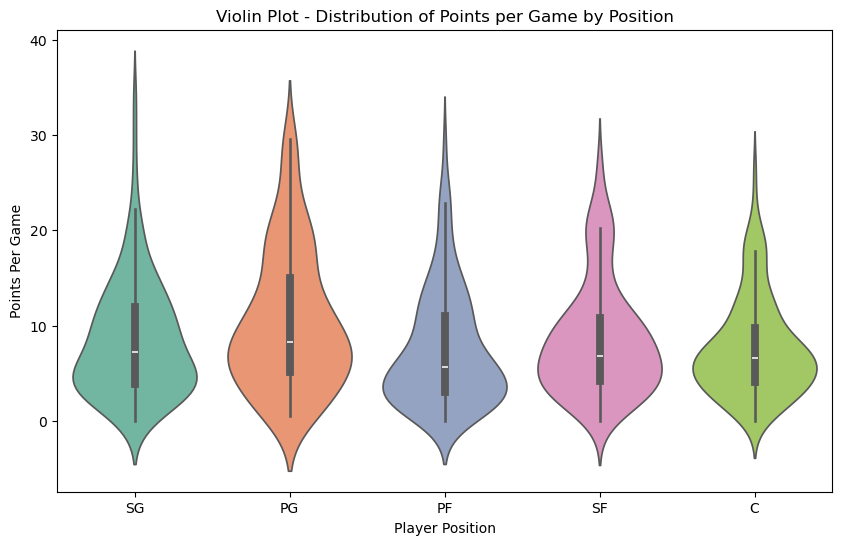

In [57]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Pos', y='PTS', data=df, hue='Pos', palette='Set2', legend=False)
plt.title("Violin Plot - Distribution of Points per Game by Position")
plt.xlabel("Player Position")
plt.ylabel("Points Per Game")
plt.show()


### 4.CONCLUSION :